In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']

#import graphviz 
#%autoreload

72.0

In [321]:
example_list = list ( range ( 1, 6))
example_list[5:2:-1]
example_list

[1, 2, 3, 4, 5]

In [322]:
import os
df = pd.read_excel ('../Data-Science-Projects-with-Python/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls' )


In [323]:
df.shape
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Is ID Unique?

In [324]:
df['ID'].nunique()

29687

In [325]:
df.shape

(30000, 25)

### Which values are duplicates?

In [326]:
id_counts = df['ID'].value_counts ()
id_counts.head()

5b8dce34-2ded    2
a51dbaae-d88b    2
1bf3b4eb-d759    2
dab579ee-1645    2
3cfed539-ad58    2
Name: ID, dtype: int64

In [327]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [328]:
id_counts [id_counts == 2] [0:10]

5b8dce34-2ded    2
a51dbaae-d88b    2
1bf3b4eb-d759    2
dab579ee-1645    2
3cfed539-ad58    2
8a6bbf3d-8a2d    2
8f4a90bc-bbb0    2
af1e3f79-f628    2
0a2d6db4-0c54    2
a9870d3e-b4d1    2
Name: ID, dtype: int64

In [329]:
dupe_id = id_counts [id_counts == 2]

## Remove these duplicates from the table

### Are there complete blank rows?

In [330]:
df.loc [ df['ID'].isin ( dupe_id.index)  ,  ] [ 0:5].sort_values ('ID')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
323,73ed1381-3a3f,230000,2,2,1,28,0,0,0,-2,...,2100,767,6173,1710,1100,1000,767,6173,1000,1


Create a boolean to identify rows with all 0s

In [331]:
df_zero_mask = df == 0
df_zero_mask = df_zero_mask.iloc[:,1:] # grabbing all features except Index...
df_zero_mask.iloc [0:5, : ]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,True


In [332]:
df_zero_mask.head (2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,True,True,True,...,False,False,False,True,False,False,False,True,False,False


In [333]:
df_zero_mask.loc [ df_ zero_mask['ID'].isin ( dupe_id.index)  ,  ] [ 0:5].sort_values ('ID')

SyntaxError: invalid syntax (<ipython-input-333-98eec5adc0e2>, line 1)

In [ ]:
df_zero_mask.loc [ df['ID'].isin ( dupe_id.index)  ,  ] [ 0:5].sort_values ('ID')

In [ ]:
boolMask = df_zero_mask.sum ( axis=1) == len (df_zero_mask.columns)
boolMask.value_counts () 

### Apply the mask to create a de-duplicated DF and check.

In [ ]:
df_clean_1 = df[ -boolMask ].copy()

In [ ]:
df_clean_1.shape

In [ ]:
df_clean_1['ID'].nunique()

#### Hooray

### Inspect the cleaned data frame

In [ ]:
df_clean_1.info()

### Investigate and Clean PAY_1

In [ ]:
df_clean_1['PAY_1'].value_counts()

### Remove 'Not Available' Values

In [ ]:
valid_pay_1_mask = df_clean_1 ['PAY_1'] != 'Not available'
valid_pay_1_mask.value_counts ()
#sum ( valid_pay_1_mask)

In [ ]:
df_clean_2 = df_clean_1.loc [ valid_pay_1_mask, :  ].copy()

In [ ]:
df_clean_2.shape 

###### Done

#### Change PAY_1 type to int64

In [ ]:
df_clean_2['PAY_1'].dtype

In [ ]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype ('int64')
df_clean_2['PAY_1'].dtype

In [ ]:
df_clean_2[['PAY_1', 'PAY_2']].info ()

#### Deal with the -2 values
-2 means account started that month with zero balance / never used any credit <br>
-1 means the account had a balance that was paid in full<br>
 0 means that at least the minimum payment was made, but the entire balance wasn't paid (positive balance was carried forward)

#### Explore 2 continuous variables (Credit Limit and Demographic Features)

In [ ]:
import matplotlib.pyplot as plt
# render plotting automatically
%matplotlib inline
import matplotlib as mpl # additional plotting functionality
mpl.rcParams['figure.dpi'] = 400 # high res figures


In [ ]:
df_clean_2[['LIMIT_BAL','AGE']].hist()


In [ ]:
df_clean_2[['LIMIT_BAL','AGE']].describe()

#### Convert LIMIT from Taiwan curr. to dollars

In [ ]:
pd.DataFrame ( {'LIMIT_BAL_DOLLARS':df_clean_2['LIMIT_BAL'] / 30} ).describe ()

#### Obtain value_counts for EDUCATION
0 Other <BR>
1 Grad School<BR>
2 University<BR>
3 High School<BR>
4 Other<BR>
5 Other<BR>
6 Other<BR>

In [ ]:
df_clean_2['EDUCATION'].value_counts()

#### Consolidate Other Values into key value 4

In [ ]:
df_clean_2['EDUCATION'].replace ( to_replace=[0,5,6], value=4, inplace=True )

In [ ]:
df_clean_2['EDUCATION'].value_counts()

#### MARRIAGE
0 Not documented <BR> 
1 Married<BR>
2 Single <BR>
3 Others<BR>

In [ ]:
df_clean_2['MARRIAGE'].value_counts ()


#### Place 0 in with 3 (Others)

In [ ]:
df_clean_2['MARRIAGE'].replace ( to_replace =[0], value=3, inplace=True  )

In [ ]:
df_clean_2['MARRIAGE'].value_counts ()


### Look at the categorical features

#### Education Level

In [ ]:
df_clean_2.groupby('EDUCATION').agg ({ 'default payment next month': ['mean'] } ).plot.bar (legend=False)
plt.ylabel ('defaults')
plt.xlabel ('Education Code')

## Implement One Hot Encoding for the Education Feature

###### Reverse engineer the Education Feature first

In [ ]:
df_clean_2['EDUCATION_2'] = 'none'

In [ ]:
df_clean_2[['EDUCATION' ,'EDUCATION_2']].head (3)

In [ ]:
cat_mapping = {
    1: 'grad school',
    2: 'uni',
    3: 'high school',
    4: 'other'
}
cat_mapping


In [ ]:
df_clean_2['EDUCATION_2'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION' ,'EDUCATION_2']].head (6)

#### Now create one hot values out of EDUCATION_2

In [ ]:
edu_ohe = pd.get_dummies ( df_clean_2['EDUCATION_2'])
edu_ohe.head (10)

#### Concatenate the OHE DataFrame to the original data frame

In [ ]:
df_with_ohe = pd.concat ( [df_clean_2, edu_ohe], axis = 1)
df_with_ohe.tail (5)

#### Write the cleaned data frame to a CSV

In [ ]:
df_with_ohe.to_csv ('chapter_1_cleaned_data.csv')

#### Create the Financial History Features in the Dataset

##### First read in the saved dataset

In [ ]:
df_with_ohe_2 = pd.read_csv ('chapter_1_cleaned_data.csv')
df_with_ohe_2.head (5)

#### Create an analysis DF with pay features

In [335]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']
df_with_ohe_2[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


Text(0, 0.5, 'Number of Accounts')

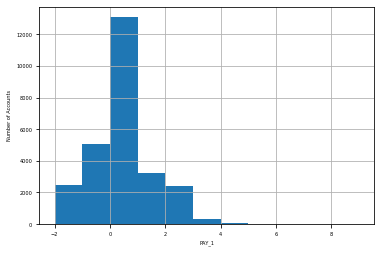

In [364]:
pay_1_bins = np.array ( range (-2, 10, )) - 0.5
pay_1_bins
df_clean_2.loc [:, pay_feats[0] ].hist (bins = pay_1_bins)
plt.xlabel ('PAY_1')
plt.ylabel ( 'Number of Accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D384A78508>,
      dtype=object)

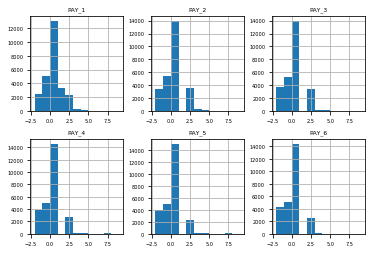

In [366]:
mpl.rcParams ['font.size']= 5
df_clean_2[pay_feats].hist (bins = pay_1_bins, layout = (2,3) )

#### Explore the remaining financial features

In [368]:
df_clean_2.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_2'],
      dtype='object')

In [379]:
lst_bill_features = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'] 

lst_amt_features = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 

#### Examine Payment Amount Features

Text(0.5, 1.0, 'Amount Paid')

<Figure size 4000x4000 with 0 Axes>

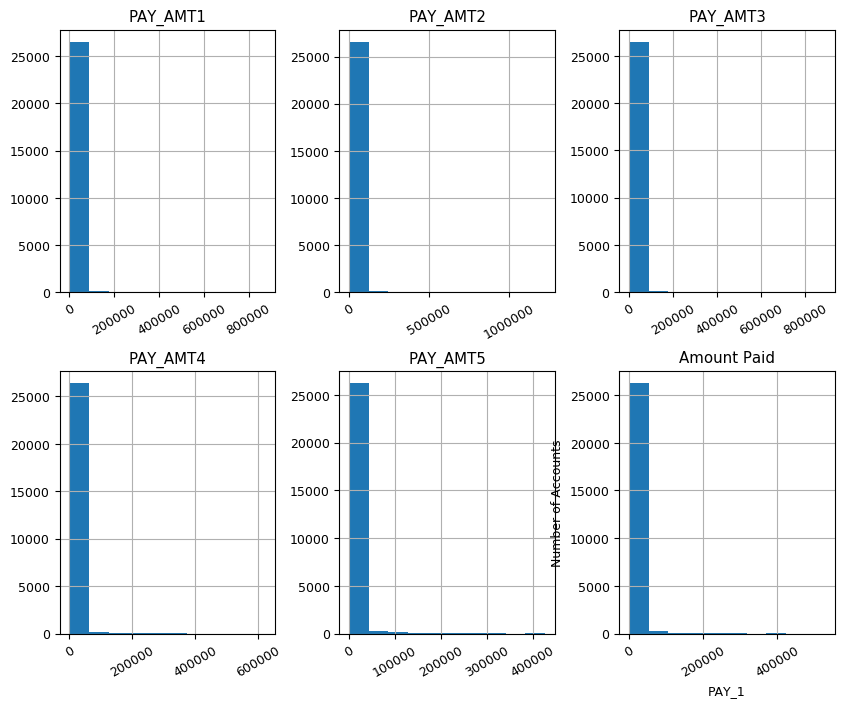

In [415]:
fig=plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 9 # 200 e.g. is really fine, but slower

df_with_ohe_2[lst_amt_features].hist( layout=(2,3), xrot=30 )
plt.xlabel ('PAY_1')
plt.ylabel ( 'Number of Accounts')
plt.title ('Amount Paid')

#### Lots of zeros in the above plots. How many?

In [417]:
pay_zero_mask = df_clean_2[lst_amt_features]==0
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

#### ... which indicates that the first bin contains low, non-zero numbers

#### Redo the payment histogram with a logarithmic scale

Text(0, 0.5, 'Accounts')

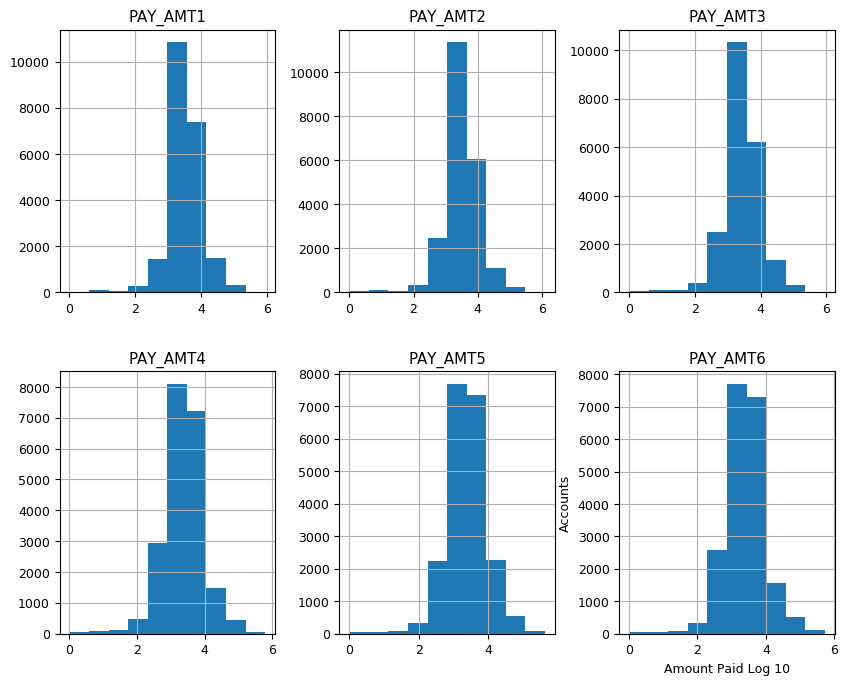

In [419]:
df_clean_2 [lst_amt_features ][~pay_zero_mask].apply ( np.log10).hist (layout=(2,3))
plt.xlabel ('Amount Paid Log 10')
plt.ylabel ( 'Accounts')


#### Try and set up custom bin widths

<Figure size 4000x4000 with 0 Axes>

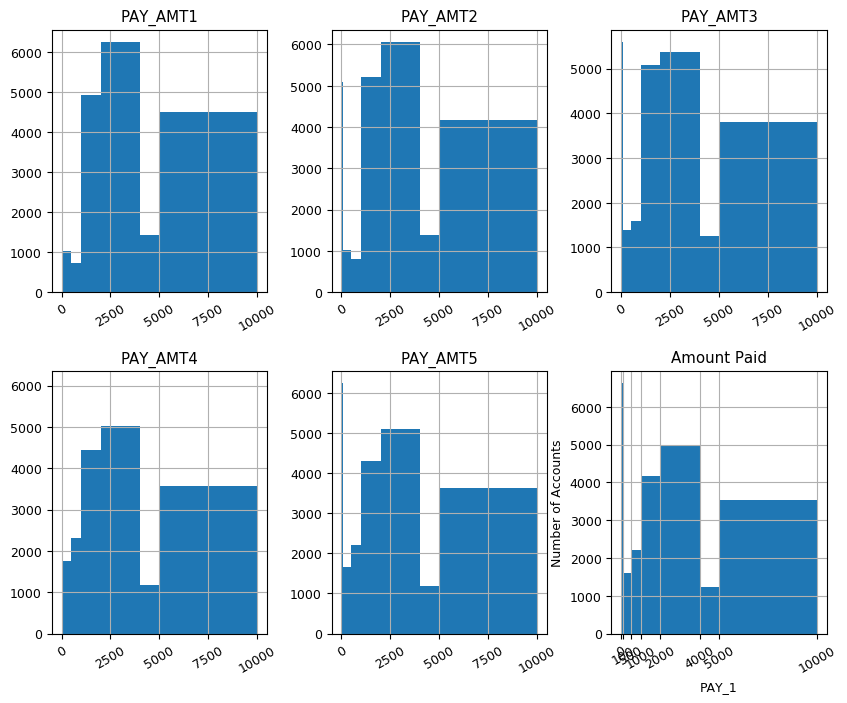

In [437]:
fig=plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')


plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 9 # 200 e.g. is really fine, but slower


df_with_ohe_2[lst_amt_features].hist( layout=(2,3), xrot=30, bins = [0,100,500, 1000,2000, 4000,5000, 10000] )

plt.xlabel ('PAY_1')
plt.ylabel ( 'Number of Accounts')
plt.title ('Amount Paid')

ax = plt.gca()
ax.set_xticks([0,100,500, 1000,2000, 4000,5000, 10000])



In [408]:
df_clean_2[lst_amt_features].describe () 

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


#### Examine Bill Features

In [384]:
df_with_ohe_2[lst_bill_features].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Text(0, 0.5, 'Number of Accounts')

<Figure size 4000x4000 with 0 Axes>

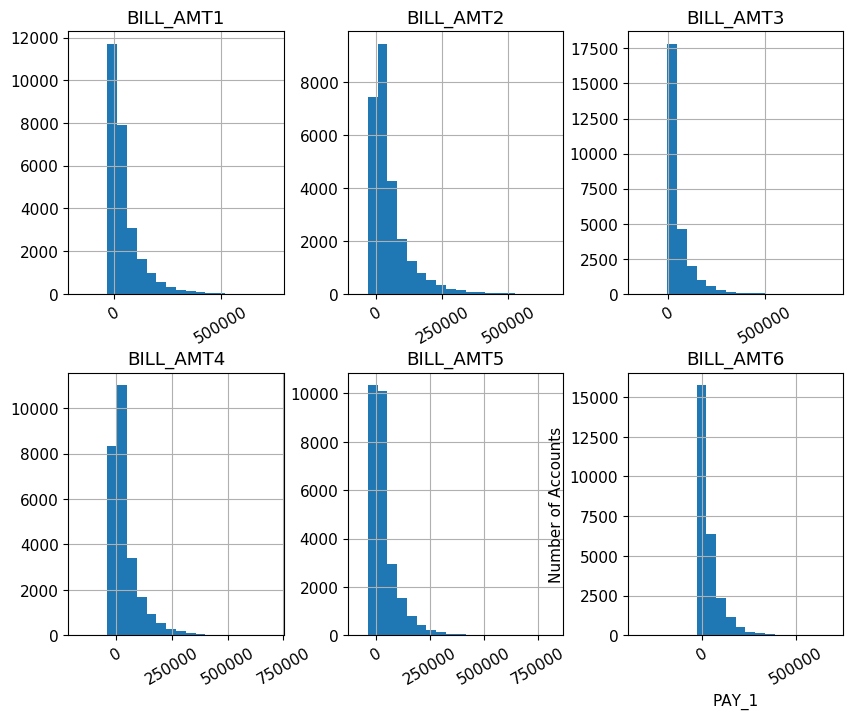

In [396]:
fig=plt.figure(figsize=(20,20), dpi= 200, facecolor='w', edgecolor='k')

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 11 # 200 e.g. is really fine, but slower

df_with_ohe_2[lst_bill_features].hist( layout=(2,3), xrot=30, bins=20 )
plt.xlabel ('PAY_1')
plt.ylabel ( 'Number of Accounts')

